In [2]:
import pandas as pd

mobile_addiction_dataframe = pd.read_csv('Data\mobile_addiction.csv')

mobile_addiction_dataframe.shape

(13589, 12)

In [3]:


mobile_addiction_dataframe.describe()


,Unnamed: 0,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed
count,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.00000,13589.000000,13589.000000
mean,6794.000000,3.768121,30.037604,1.545956,1.034219,60.015306,0.990213,33.055707,5.97807,4.265288,27.532048
std,3922.950739,1.897280,7.406585,1.204830,0.993172,12.732064,0.946606,10.118145,2.07139,2.288454,5.894790
min,0.000000,0.000000,8.000000,0.000000,0.000000,25.000000,0.000000,15.000000,0.00000,0.000000,10.000000
25%,3397.000000,2.000000,25.000000,1.000000,0.000000,50.000000,0.000000,25.000000,5.00000,3.000000,23.000000
50%,6794.000000,4.000000,30.000000,1.000000,1.000000,59.000000,1.000000,33.000000,6.00000,4.000000,27.000000
75%,10191.000000,5.000000,35.000000,2.000000,2.000000,70.000000,2.000000,41.000000,7.00000,6.000000,31.000000
max,13588.000000,12.000000,60.000000,7.000000,6.000000,103.000000,6.000000,55.000000,14.00000,10.000000,55.000000


In [4]:

mobile_addiction_dataframe.info()

non_numeric = mobile_addiction_dataframe.select_dtypes(exclude='number')

for col in non_numeric.columns:
    print(non_numeric[col].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13589 entries, 0 to 13588
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          13589 non-null  int64 
 1   daily_screen_time   13589 non-null  int64 
 2   app_sessions        13589 non-null  int64 
 3   social_media_usage  13589 non-null  int64 
 4   gaming_time         13589 non-null  int64 
 5   notifications       13589 non-null  int64 
 6   night_usage         13589 non-null  int64 
 7   age                 13589 non-null  int64 
 8   work_study_hours    13589 non-null  int64 
 9   stress_level        13589 non-null  int64 
 10  apps_installed      13589 non-null  int64 
 11  addicted            13589 non-null  object
dtypes: int64(11), object(1)
memory usage: 1.2+ MB
addicted
addicted        6846
not addicted    6743
Name: count, dtype: int64


In [5]:
mapping = {
    'not addicted': 0,
    'addicted':     1
}

# apply it in-place
mobile_addiction_dataframe['addicted'] = mobile_addiction_dataframe['addicted'].map(mapping)

# verify
print(mobile_addiction_dataframe['addicted'].value_counts())

addicted
1    6846
0    6743
Name: count, dtype: int64


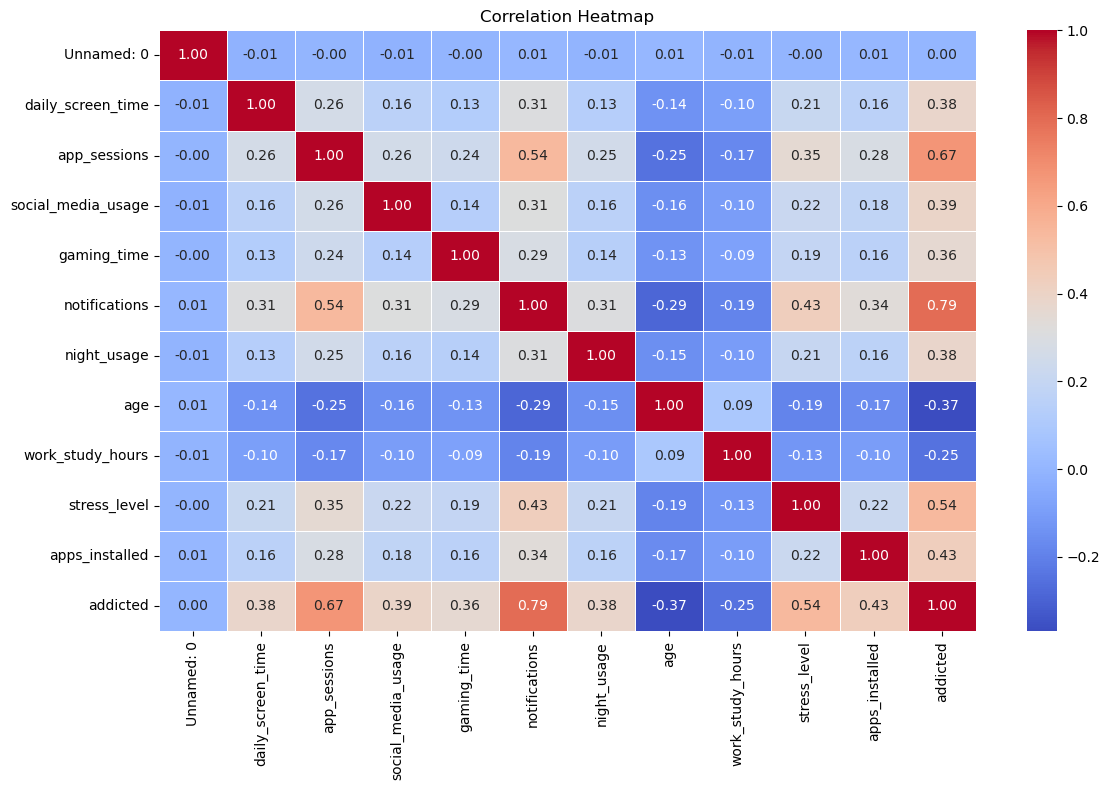

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = mobile_addiction_dataframe.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 1. Load or reference your DataFrame:
#    replace `df` below with whatever your DataFrame variable is
#    (e.g. if it’s called `mobile_addiction_dataframe`, just do df = mobile_addiction_dataframe.copy())
df = mobile_addiction_dataframe.copy()

# 2. Separate features & target
X = df.drop(columns=['Unnamed: 0', 'addicted'])
y = df['addicted']

# 3. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 4. Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Predict & evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {auc:.3f}")

# 6. Inspect feature coefficients
coefs = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

print("\nFeature Coefficients:")
print(coefs.to_string(index=False))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1336
           1       0.98      0.98      0.98      1382

    accuracy                           0.98      2718
   macro avg       0.98      0.98      0.98      2718
weighted avg       0.98      0.98      0.98      2718

ROC AUC Score: 0.998

Feature Coefficients:
           feature  coefficient
       gaming_time     0.956908
       night_usage     0.906672
social_media_usage     0.793278
      stress_level     0.670612
 daily_screen_time     0.463856
     notifications     0.341365
      app_sessions     0.320258
  work_study_hours    -0.252311
    apps_installed     0.203408
               age    -0.073264


In [8]:
Time_Wasters_dataframe = pd.read_csv('Data\Time-Wasters on Social Media.csv')

Time_Wasters_dataframe.shape

(1000, 31)

In [12]:
Time_Wasters_dataframe.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [11]:

Time_Wasters_dataframe.info()

non_numeric = Time_Wasters_dataframe.select_dtypes(exclude='number')

for col in non_numeric.columns:
    print(non_numeric[col].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

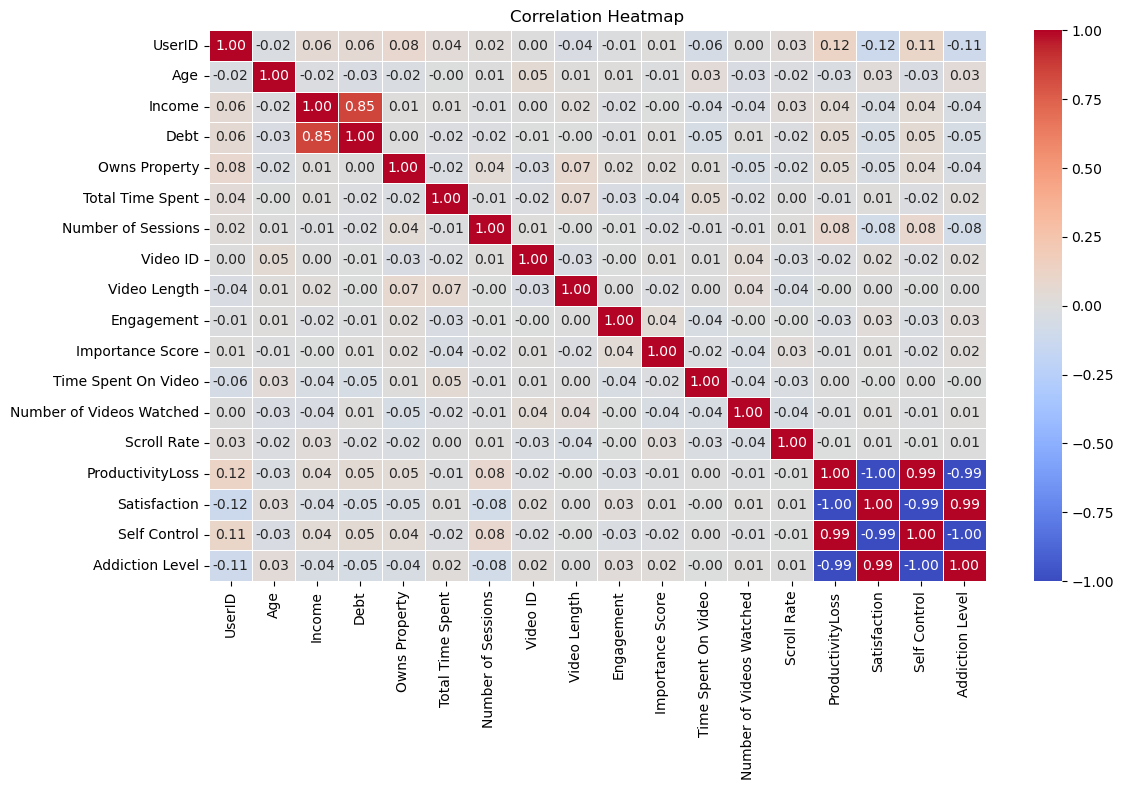

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = Time_Wasters_dataframe.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop(columns=['UserID', 'Video ID', 'Income'])  # features
y = df['Income']                                       # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

cat_idx = [X.columns.get_loc(c) for c in cat_cols]

model = CatBoostRegressor(
    depth=6, learning_rate=0.05, iterations=1000,
    loss_function='RMSE', random_seed=42, verbose=200)

model.fit(X_train, y_train, cat_features=cat_idx,
          eval_set=(X_test, y_test),
          early_stopping_rounds=50)

print("Test R²:",
      round(r2_score(y_test, model.predict(X_test)), 3))


0:	learn: 1.9851126	test: 2.2077327	best: 2.2077327 (0)	total: 34.1ms	remaining: 34.1s
200:	learn: 0.0344545	test: 0.1119236	best: 0.1119069 (192)	total: 3.68s	remaining: 14.6s
400:	learn: 0.0203159	test: 0.1089652	best: 0.1089652 (400)	total: 7.32s	remaining: 10.9s
600:	learn: 0.0127481	test: 0.1074293	best: 0.1073708 (589)	total: 11.9s	remaining: 7.92s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1073708237
bestIteration = 589

Shrink model to first 590 iterations.
Test R²: 0.998


In [38]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop(columns=['UserID', 'Video ID', 'Income'])  # features
y = df['Satisfaction']                                       # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

cat_idx = [X.columns.get_loc(c) for c in cat_cols]

model = CatBoostRegressor(
    depth=6, learning_rate=0.05, iterations=1000,
    loss_function='RMSE', random_seed=42, verbose=200)

model.fit(X_train, y_train, cat_features=cat_idx,
          eval_set=(X_test, y_test),
          early_stopping_rounds=50)

print("Test R²:",
      round(r2_score(y_test, model.predict(X_test)), 3))


0:	learn: 1.9851126	test: 2.2077327	best: 2.2077327 (0)	total: 42.7ms	remaining: 42.7s
200:	learn: 0.0344545	test: 0.1119236	best: 0.1119069 (192)	total: 4.18s	remaining: 16.6s
400:	learn: 0.0203159	test: 0.1089652	best: 0.1089652 (400)	total: 7.9s	remaining: 11.8s
600:	learn: 0.0127481	test: 0.1074293	best: 0.1073708 (589)	total: 12.3s	remaining: 8.19s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1073708237
bestIteration = 589

Shrink model to first 590 iterations.
Test R²: 0.998
